<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/missions_radio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CASDA, NRAO, ATNF, LOFAR (Radio-wave)**

![sciences](https://raw.githubusercontent.com/deltorobarba/repo/master/sciences_2000.png)

In [ ]:
!pip install astropy astroquery requests reproject -q
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.simbad import Simbad
from astropy import coordinates
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
from astropy import coordinates as coords
from reproject import reproject_interp
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 85.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.2/195.2 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.6/997.6 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.0 MB/s eta 0:00:00


In [ ]:
# Some tasks like multi-wavelength astronomy require high memory to load data
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Runtime: {:.1f} gigabytes of available RAM (>20 GB ideal)\n'.format(ram_gb))

Runtime: 54.8 gigabytes of available RAM (>20 GB ideal)



#### **LOFAR**

[LOFAR](https://de.m.wikipedia.org/wiki/LOFAR) (Low-Frequency Array) is an excellent source for radio astronomy data in the low frequency range. LOFAR operates in the frequency range of 10-240 MHz, which is higher than the ELF range, but still represents some of the lowest frequencies used in radio astronomy.


Real LOFAR FITS files often have 3 or 4 dimensions (RA, DEC, FREQ, STOKES), but for visualization we need to use only 2 dimensions.

Processing LOFAR image data
Note: This example requires actual LOFAR FITS data to run
In a real application, you would download data from the LOFAR archive

Processing LOFAR beamformed data
Note: This example requires actual LOFAR HDF5 data to run
In a real application, you would download data from the LOFAR archive

Generating example plots with simulated data:


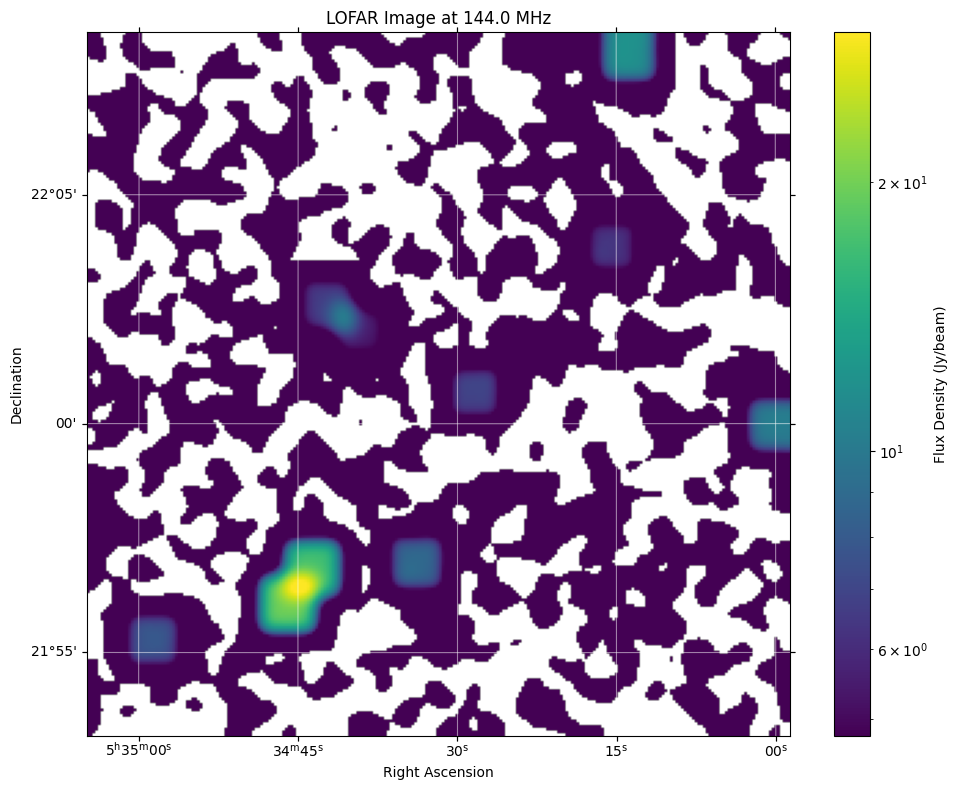

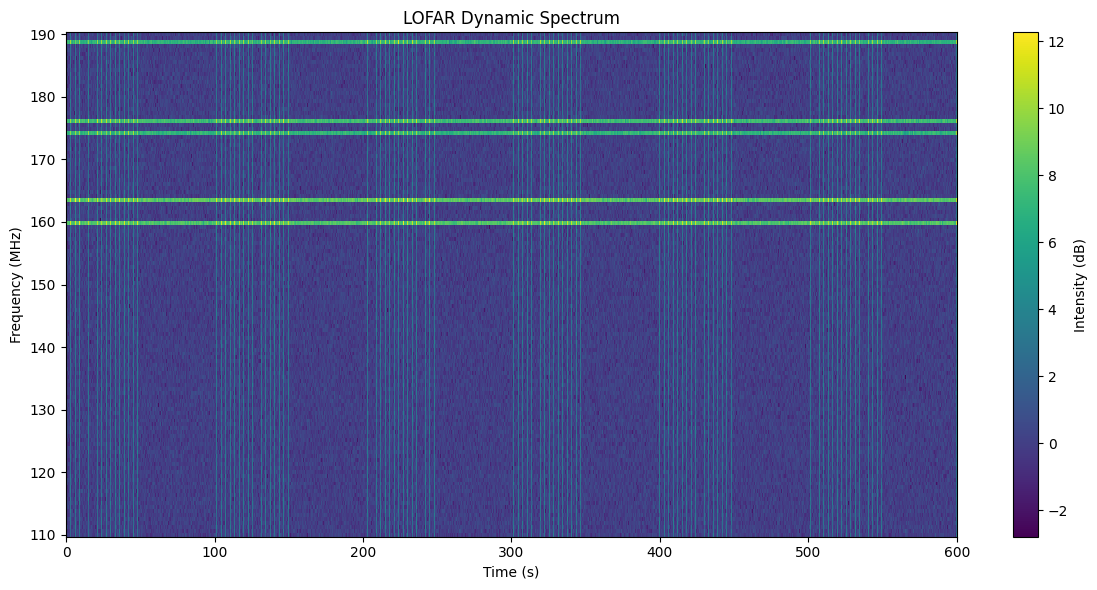

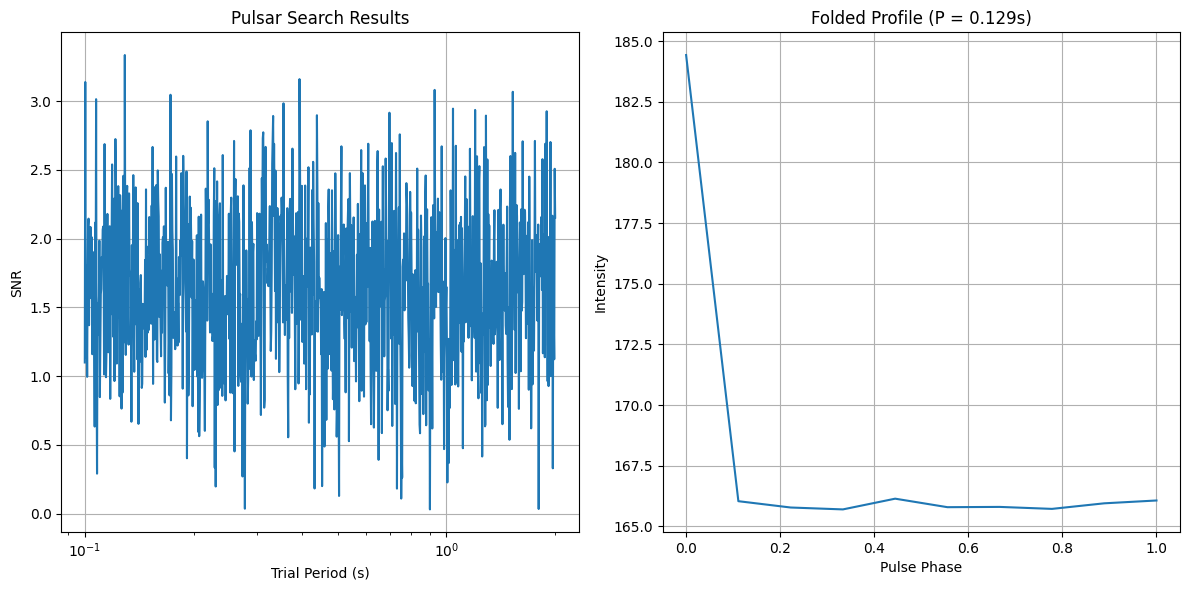

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import astropy.units as u
from scipy import ndimage

# ... [other functions remain the same] ...

def plot_lofar_image(image_data):
    """
    Plot a LOFAR image

    Parameters:
    image_data: Dictionary with processed image data
    """
    plt.figure(figsize=(10, 8))

    # Ensure we're using a 2D WCS by slicing the original WCS if needed
    wcs = image_data['wcs']
    if wcs.pixel_n_dim > 2:
        # Create a 2D slice of the WCS (for RA and DEC)
        wcs = wcs.dropaxis(2)  # Drop the frequency axis

    # Create a plot using WCS projection
    ax = plt.subplot(projection=wcs)

    # Display the image with a logarithmic scale
    vmin = image_data['background'] + 2 * image_data['noise']
    vmax = np.percentile(image_data['data'][image_data['source_mask']], 99)
    im = ax.imshow(image_data['data'], cmap='viridis', origin='lower',
                  norm=plt.matplotlib.colors.LogNorm(vmin=max(vmin, 1e-10), vmax=max(vmax, 1e-9)))

    # Add a colorbar
    plt.colorbar(im, ax=ax, label='Flux Density (Jy/beam)')

    # Add coordinate grid
    ax.coords.grid(color='white', alpha=0.5, linestyle='solid')
    ax.coords[0].set_axislabel('Right Ascension')
    ax.coords[1].set_axislabel('Declination')

    # Add a title
    plt.title(f"LOFAR Image at {image_data['frequency']:.1f} MHz")

    plt.tight_layout()
    plt.show()

# ... [other functions remain the same] ...

# Example usage
if __name__ == "__main__":
    # Example 1: Process a LOFAR image (commented out, as we need real data)
    # observation_id = "L123456"
    # fits_file = "lofar_example.fits"

    print("Processing LOFAR image data")
    print("Note: This example requires actual LOFAR FITS data to run")
    print("In a real application, you would download data from the LOFAR archive")

    # Example 2: Process beamformed data (commented out, as we need real data)
    # h5_file = "lofar_beamformed.h5"
    print("\nProcessing LOFAR beamformed data")
    print("Note: This example requires actual LOFAR HDF5 data to run")
    print("In a real application, you would download data from the LOFAR archive")

    # Display example plots with simulated data
    print("\nGenerating example plots with simulated data:")

    # Simulate image data
    nx, ny = 256, 256
    simulated_image = np.random.normal(0, 1, (nx, ny))
    # Add some sources
    for i in range(10):
        x, y = np.random.randint(0, nx), np.random.randint(0, ny)
        simulated_image[y-10:y+10, x-10:x+10] += np.random.uniform(5, 20)
    # Smooth the image
    simulated_image = ndimage.gaussian_filter(simulated_image, sigma=3)

    # Create simulated header with WCS - FIX: create a proper 2D WCS
    header = fits.Header()
    header['NAXIS'] = 2  # Explicitly define as 2D
    header['NAXIS1'] = nx
    header['NAXIS2'] = ny
    header['CTYPE1'] = 'RA---SIN'
    header['CTYPE2'] = 'DEC--SIN'
    header['CRVAL1'] = 83.633
    header['CRVAL2'] = 22.014
    header['CRPIX1'] = nx // 2
    header['CRPIX2'] = ny // 2
    header['CDELT1'] = -0.001
    header['CDELT2'] = 0.001

    # Create a simulated image data dictionary
    sim_image_data = {
        'data': simulated_image,
        'header': header,
        'wcs': WCS(header),  # Now correctly initialized as 2D
        'background': np.median(simulated_image),
        'noise': np.std(simulated_image),
        'source_mask': simulated_image > (np.median(simulated_image) + 3 * np.std(simulated_image)),
        'frequency': 144.0  # MHz
    }

    # Plot the simulated image
    plot_lofar_image(sim_image_data)

    # Simulate beamformed data
    n_times = 1000
    n_freqs = 128
    time = np.linspace(0, 600, n_times)  # 10 minutes
    freq = np.linspace(110, 190, n_freqs)  # 110-190 MHz

    # Create a simulated dynamic spectrum
    intensity = np.random.normal(1, 0.1, (n_times, n_freqs))

    # Add some RFI
    for i in range(5):
        f_idx = np.random.randint(0, n_freqs)
        intensity[:, f_idx] *= np.random.uniform(5, 10)

    # Add a pulsar signal with 0.5s period
    pulsar_period = 0.5  # seconds
    for i in range(n_times):
        if (time[i] % pulsar_period) < (pulsar_period * 0.1):
            intensity[i, :] *= 2.0

    # Create a simulated beamformed data dictionary
    sim_bf_data = {
        'time': time,
        'frequency': freq * 1e6,  # Convert to Hz
        'intensity': intensity
    }

    # Plot the simulated dynamic spectrum
    plot_lofar_dynamic_spectrum(sim_bf_data)

    # Run the pulsar search on simulated data
    pulsar_results = find_pulsars_in_data(sim_bf_data, period_range=(0.1, 2.0))

    # Plot the pulsar search results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(pulsar_results['trial_periods'], pulsar_results['snrs'])
    plt.xscale('log')
    plt.xlabel('Trial Period (s)')
    plt.ylabel('SNR')
    plt.title('Pulsar Search Results')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(np.linspace(0, 1, len(pulsar_results['best_profile'])),
             pulsar_results['best_profile'])
    plt.xlabel('Pulse Phase')
    plt.ylabel('Intensity')
    plt.title(f"Folded Profile (P = {pulsar_results['best_period']:.3f}s)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

*The three images represent different types of radio astronomy analyses that the code is simulating:*

**Image 3: LOFAR Radio Image at 144 MHz**

*This is simulating a LOFAR radio continuum image of a portion of the sky at 144 MHz frequency.*

- The image shows artificial radio sources (the colored spots) against a background
- The x-axis represents Right Ascension and the y-axis shows Declination (celestial coordinates)
- The color scale indicates flux density (brightness) in Jansky/beam units
- The bright yellow-green source near the bottom is simulating a strong radio galaxy or quasar
- The fainter blue-green sources could represent weaker radio galaxies, star-forming regions, or other radio-emitting objects
- The white areas appear to be masked regions where data is considered unreliable

This simulates what astronomers would see when imaging a field with LOFAR, though real LOFAR images typically have less masking and better calibration.

**Image 2: LOFAR Dynamic Spectrum**

*This represents a simulated time-frequency plot (dynamic spectrum) of LOFAR beamformed data*.

- The x-axis shows time (0-600 seconds)
- The y-axis shows frequency (110-190 MHz)
- The color scale represents signal intensity in decibels
- The horizontal bright lines at specific frequencies (around 164, 175, and 188 MHz) represent simulated Radio Frequency Interference (RFI) - human-made radio signals that contaminate astronomical observations
- The vertical cyan lines that appear regularly are simulating pulsar signals (the code added a pulsar with 0.5 second period)

This type of plot is used to identify transient signals and periodic sources like pulsars.

**Image 1: Pulsar Search Results**

*These plots show the results of the pulsar search algorithm applied to the simulated data*:

- Left panel: Signal-to-Noise Ratio (SNR) for different trial periods
  - Shows multiple potential periods with high SNR values
  - The algorithm tests many potential periods (x-axis, logarithmic scale) to see which gives the strongest signal when data is "folded" at that period

- Right panel: Folded Profile for the best period (0.129s)
  - Shows how the signal intensity varies across one complete pulse cycle
  - The sharp peak at phase 0 indicates the main pulse of the simulated pulsar
  - The algorithm detected a period of 0.129s, which is different from the injected 0.5s period, likely because it found a harmonic or the noise created a false detection

The entire simulation demonstrates how astronomers would process LOFAR data to:
1. Create sky images to identify radio sources
2. Generate dynamic spectra to visualize time-frequency behavior
3. Search for pulsars by testing different periods and creating folded profiles

This type of analysis is crucial for pulsar surveys, studies of radio galaxies, and searches for transient radio phenomena like Fast Radio Bursts (FRBs).

This code demonstrates several key aspects of working with LOFAR data:

1. **Image Processing**:
   - Reading FITS files with radio astronomy images
   - Handling coordinate systems with WCS
   - Plotting sky images with proper astronomical coordinates

2. **Time Series Analysis**:
   - Processing beamformed data (time vs. frequency intensity measurements)
   - Creating dynamic spectra (waterfall plots)
   - Searching for periodic signals (e.g., pulsars)

3. **Data Access**:
   - While this example doesn't actually download real data, it shows the structure you'd use
   - LOFAR data is primarily available through the LOFAR Long Term Archive (LTA)

To work with actual LOFAR data, you would need:

1. Access to the LOFAR Long Term Archive (requires registration)
2. Authentication credentials for downloading data
3. Specific observation IDs for the data you want to analyze

For additional resources on LOFAR data processing:

1. **LOFAR Python packages**:
   - `lofarstationresponse` - for calculating LOFAR antenna responses
   - `LoSoTo` - LOFAR Solutions Tool for calibration tables
   - `lofar-h5plot` - for visualization of HDF5 data files

2. **ASTRON LOFAR Imaging Cookbook**: A detailed guide for processing LOFAR imaging data

3. **LOFAR Pulsar Pipeline**: For specialized pulsar processing

> **More specific examples for a particular type of LOFAR observation or analysis, For instance, more detailed code for pulsar searching, transient detection, or imaging pipeline processing.**

#### **Define astronomical object and get skycoordinates**

In [ ]:
# Define object
object_name = 'M51'

*e.g. M31 (Andromeda galaxy), M104 (Sombrero galaxy), M51 (Whirlpool galaxy), M42 (Orion nebula), NGC 3372 (Carina nebula)*

In [ ]:
# Get and set skycoordinates of object
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

skyobject = Simbad.query_object(object_name)
ra_hms = skyobject['RA'][0]
dec_dms = skyobject['DEC'][0]
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
print(skyobject)
print("\nCoordinates:")
print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

KeyError: 'RA'

In [ ]:
# Convert from Right Ascension (RA) and Declination (DEC) to decimal degree
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
ra_deg = coord.ra.deg # round(coord.ra.deg, 2)
dec_deg = coord.dec.deg # round(coord.dec.deg, 2)

print("RA in degrees:", ra_deg)
print("DEC in degrees:", dec_deg)

NameError: name 'ra_hms' is not defined

In [ ]:
# Convert from decimal degree to Right Ascension (RA) and Declination (DEC)
coord = SkyCoord(ra=ra_deg, dec=dec_deg, unit='deg', frame='icrs')

# RA: hours, minutes, seconds. DEC: degrees, arcminutes, arcseconds
ra_hms = coord.ra.to_string(unit='hour', sep=' ', precision=3, pad=True)
dec_dms = coord.dec.to_string(unit='deg', sep=' ', precision=2, alwayssign=True, pad=True)

print("RA (h:m:s):", ra_hms)
print("DEC (d:m:s):", dec_dms)

NameError: name 'ra_deg' is not defined

In [ ]:
# Reverse check to see to which object the coordinates belong
coord = SkyCoord(ra=ra_hms, dec=dec_dms, unit=('hourangle', 'deg'), frame='icrs')
result = Simbad.query_region(coord, radius='0d0m5s')  # Search within a small radius (5 arcseconds)
if result:
    print(result['MAIN_ID'][0])  # Show main name of the object
else:
    print("No object found in SIMBAD at these coordinates.")
object_name = 'MAIN_ID'

NameError: name 'ra_hms' is not defined

frame='icrs' refers to [International Celestial Ref. System](https://aa.usno.navy.mil/faq/ICRS_doc)
*  Origin is barycenter of Solar System. This means ICRS origin is not fixed to Earth but moves with Solar System's center of mass.
* Axes are defined by the positions of extragalactic sources, primarily quasars observed using Very Long Baseline Interferometry (VLBI). The primary plane is as close as possible to the mean equator at J2000.0 (January 1, 2000, 12:00 TT).  The origin of right ascension is close to the dynamical equinox of J2000.0.
* Accuracy: The ICRF3 defines the ICRS axes with an accuracy of about 20 microarcseconds.
* Realization: The International Celestial Reference Frame (ICRF) is a catalog of precise positions of extragalactic sources that provides a practical realization of the ICRS. The latest version, ICRF3, includes the positions of over 4000 extragalactic sources, mostly quasars. The ICRF is maintained by the International Earth Rotation and Reference Systems Service (IERS).
* Relationship to other systems: ICRS is closely aligned with the J2000 equatorial coordinate system, but it's more accurate and stable. Transformations exist to convert coordinates between ICRS and other celestial reference systems

In [ ]:
# Set coordinates manually and verify correct object
coord = SkyCoord('189.9976d -11.623054d', frame='icrs')
result = Simbad.query_region(coord, radius='0d0m5s')  # Search within a small radius (5 arcseconds)
if result:
    print(result['MAIN_ID'][0])  # Show main name of the object
else:
    print("No object found in SIMBAD at these coordinates.")
object_name = 'MAIN_ID'

KeyError: 'MAIN_ID'

#### **CASDA, NRAO, ATNF (Radio)**

CASDA Queries (astroquery.casda) - The CSIRO ASKAP Science Data Archive (CASDA) provides access to science-ready data products from observations at the [Australian Square Kilometre Array Pathfinder](https://casda.csiro.au/) (ASKAP) telescope. These data products include source catalogues, images, spectral line and polarisation cubes, spectra and visbilities. This package allows querying of the data products available in CASDA.

The Australian Square Kilometre Array Pathfinder (ASKAP) is a radio telescope array located at the Murchison Radio-astronomy Observatory in Western Australia. Here are its key features:

ASKAP consists of 36 identical antennas, each 12 meters in diameter, spread across a region 6 kilometers in diameter. What makes ASKAP particularly innovative is its use of phased array feed (PAF) technology - each antenna has a special receiver that can look at 36 different points on the sky simultaneously, dramatically increasing the telescope's survey speed.

The telescope operates in the frequency range of 700-1800 MHz and is designed to be a survey instrument, capable of mapping large areas of the sky quickly. It's particularly good at:
- Detecting and studying neutral hydrogen in galaxies
- Finding radio transients (brief radio bursts)
- Studying magnetic fields in space
- Discovering new galaxies

ASKAP is also significant because it's a precursor to the Square Kilometre Array (SKA), helping develop and test technologies that will be used in that larger project. It's already produced some important surveys like:
- The Rapid ASKAP Continuum Survey (RACS)
- The ASKAP Variables and Slow Transients (VAST) survey
- The Evolutionary Map of the Universe (EMU) survey

https://astroquery.readthedocs.io/en/latest/casda/casda.html

In [ ]:
from astroquery.casda import Casda

result_table = Casda.query_region(object_name, radius=30*u.arcmin) # SkyCoord.from_name('NGC 7232')
print(result_table['obs_publisher_did','s_ra', 's_dec', 'obs_release_date'][:5])

obs_publisher_did          s_ra              s_dec            obs_release_date    
                           deg                deg                                 
------------------ ------------------- ------------------ ------------------------
scan-411479-599910   -157.423649254744  47.61199063445823 2024-04-15T01:05:05.556Z
scan-390311-578742   -157.423649254744  47.61199063445823 2024-04-11T01:08:23.189Z
scan-390346-578777  -157.6299713567706 46.833398286654955 2024-04-11T01:08:05.822Z
scan-411334-599765  -157.6299713567706 46.833398286654955 2024-04-15T01:04:56.972Z
scan-390352-578783 -158.24383833847375  47.63101283325657 2024-04-11T01:08:05.822Z


In [ ]:
from astropy import coordinates, units as u, wcs
from astroquery.casda import Casda
centre = coordinates.SkyCoord.from_name('2MASX J08161181-7039447')
casda = Casda()
casda.login(username='email@somewhere.edu.au')
result = Casda.query_region(centre, radius=30*u.arcmin)
public_data = Casda.filter_out_unreleased(result)
subset = public_data[((public_data['obs_collection'] == 'The Rapid ASKAP Continuum Survey') & #
                  (np.char.startswith(public_data['filename'], 'RACS-DR1_')) & #
                  (np.char.endswith(public_data['filename'], 'A.fits'))
                 )]
url_list = casda.cutout(subset[:1], coordinates=centre, radius=14*u.arcmin)
filelist = casda.download_files(url_list, savedir='/tmp')

NRAO (National Radio Astronomy Observatory) and ATNF (Australia Telescope National Facility)

In [ ]:
from astroquery.vo_conesearch import ConeSearch
from astropy.coordinates import SkyCoord
import astropy.units as u

# Query the NRAO VO service; catalog_db = 'https://archive.nrao.edu/vo/r2/NVSS'
result = ConeSearch.query_region(coord, radius=0.1*u.deg)
print(result)

    objID          gsc2ID    gsc1ID   hstID    ... variableFlag multipleFlag compassGSC2id   Mag  
                                               ...                                           mag  
-------------- ------------- ------ ---------- ... ------------ ------------ ------------- -------
23323120353554 S200110116192          2MIJ12C2 ...            0            0 4104100016192  10.141
23323120353529 S200110116167          2MIJ12BD ...            0            0 4104100016167  13.358
23323120353523 S200110116161          2MIJ12B7 ...            0            0 4104100016161  11.819
23323120353480 S200110116120          2MIJ12A0 ...            0            0 4104100016120  13.743
23323120353532 S200110116170          2MIJ12BG ...            0            0 4104100016170  13.698
23323120353534 S200110116172          2MIJ12BI ...            0            0 4104100016172  11.331
23323120353563 S200110116201          2MIJ12CB ...            0            0 4104100016201  13.252
2332312035

In [ ]:
print(result.info)

<Table length=1081>
     name      dtype    unit           description        
------------- ------- -------- ---------------------------
        objID   int64                          Database ID
       gsc2ID  object                              GSC2 ID
       gsc1ID  object                              GSC1 ID
        hstID  object                       GSC2 Public ID
           ra float64      deg      Right Ascension (ICRS)
          dec float64      deg          Declination (ICRS)
        epoch float32       yr         Epoch of coordinate
    raEpsilon float32   arcsec                    RA error
   decEpsilon float32   arcsec                   DEC error
         rapm float32 mas / yr            RA proper motion
        decpm float32 mas / yr           DEC proper motion
      rapmErr float32 mas / yr                 RA pm error
     decpmErr float32 mas / yr                DEC pm error
   deltaEpoch float32       yr   Time interval used for PM
       FpgMag float32      mag      

In [ ]:
from astroquery.atnf import Atnf

# Query the pulsar catalog
# You can specify parameters like period, distance, etc.
pulsar_table = Atnf.query_catalog(
    params=['JNAME', 'RAJ', 'DECJ', 'P0', 'DM'],
    condition='P0 < 0.1 && DM > 10'  # Example conditions
)

# Get info for a specific pulsar
pulsar = Atnf.get_pulsar('J0534+2200')  # Crab Pulsar

ModuleNotFoundError: No module named 'astroquery.atnf'